# Double 7's Intra (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY makes an intraday X-day low, buy.
    3. If the SPY makes an intraday X-day high, sell your long position.
    
    (optimize the number of days)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()
use_adj = False

Define high low trade periods

In [4]:
periods = range(3, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, use_adj, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,4.94,4.64,6.80,6.38,7.36,6.99,6.24,6.19,6.21,6.14,6.24,5.79,5.63
max_closed_out_drawdown,-35.28,-34.21,-34.38,-33.87,-33.82,-33.74,-33.80,-33.23,-32.99,-30.84,-30.84,-30.89,-31.00
drawdown_annualized_return,-7.14,-7.38,-5.06,-5.31,-4.59,-4.83,-5.42,-5.37,-5.31,-5.02,-4.94,-5.34,-5.50
drawdown_recovery,-2.15,-0.16,-0.21,-0.21,-0.09,-0.09,-0.09,-0.13,-0.08,-0.13,-0.13,-0.13,-0.13
best_month,11.45,10.93,11.38,14.86,14.97,15.17,17.85,17.86,17.75,17.98,17.97,18.01,18.11
worst_month,-29.76,-31.33,-31.35,-31.34,-31.38,-31.31,-31.36,-31.38,-31.24,-30.69,-30.69,-30.73,-30.85
sharpe_ratio,0.46,0.44,0.60,0.57,0.64,0.61,0.55,0.55,0.55,0.54,0.55,0.52,0.51
sortino_ratio,0.40,0.38,0.52,0.48,0.54,0.51,0.46,0.45,0.45,0.45,0.45,0.41,0.40
monthly_std,2.90,2.80,2.79,2.73,2.72,2.71,2.79,2.83,2.83,2.82,2.77,2.70,2.71
pct_time_in_market,47.61,45.91,44.57,43.54,42.80,42.29,41.89,41.49,41.00,40.46,38.70,37.59,36.43


Bar graphs

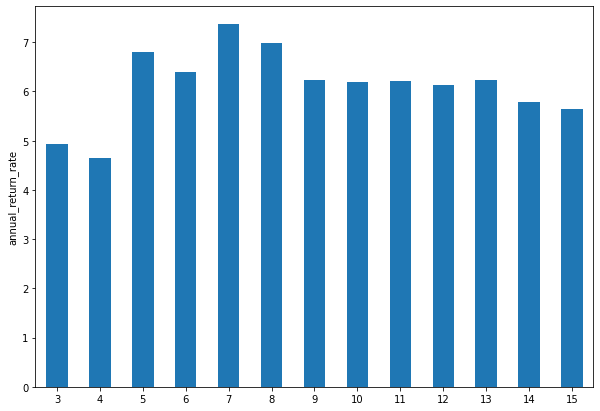

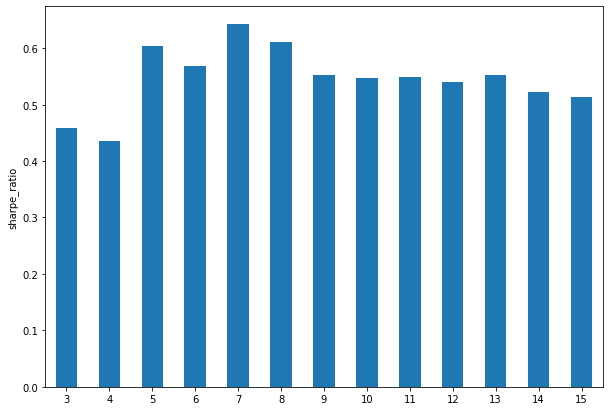

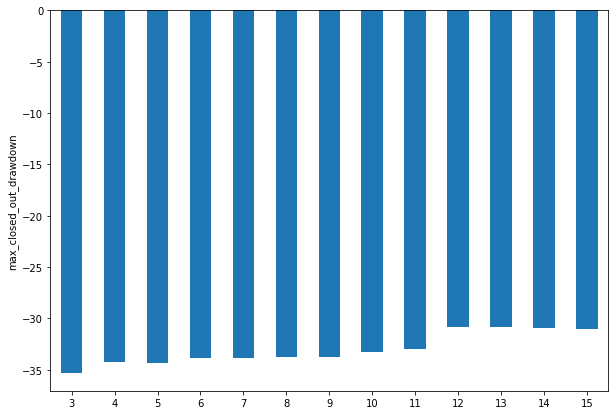

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end, s._use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-14 00:00:00 SELL 215 SPY @ 316.03


Equity curve

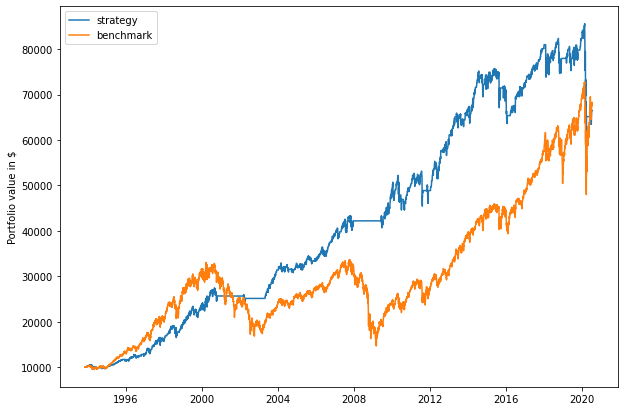

In [9]:
pf.plot_equity_curve(strategies['7'].dbal, benchmark=benchmark.dbal)